In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
data_dir = r'D:\Code\py_code\Pattern-Recognition\Better-Sirekap\data'
img_list = os.listdir(data_dir)
img_files = [os.path.join(data_dir, img) for img in img_list]

In [ ]:
def preprocess_and_crop_image(image_path, target_size=(28, 28)):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(contour)
        cropped = gray[y:y+h, x:x+w]
        resized = cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
        return resized
    
    resized = cv2.resize(gray, target_size, interpolation=cv2.INTER_AREA)
    return resized

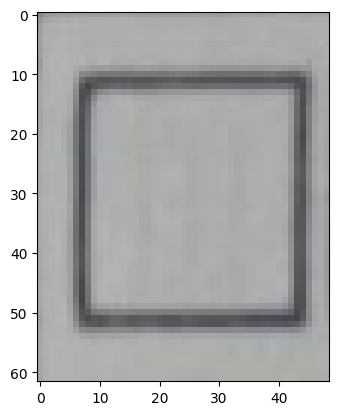

In [ ]:
original = cv2.imread(img_files[5])
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

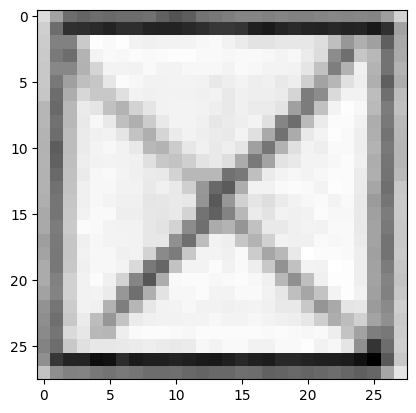

In [ ]:
preprocessed_images = preprocess_and_crop_image(img_files[8])
plt.imshow(preprocessed_images, cmap='gray')